# Training a convolutional neural network on the model

## Importing the libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, BatchNormalization, LeakyReLU, MaxPool1D, GlobalAveragePooling1D, Dense, Dropout, AveragePooling1D, Flatten, MaxPooling1D 
from tensorflow.keras.backend import clear_session


## Importing the Datset

In [3]:
# Prepare the data
data = pd.read_csv('FinalDataset.csv')

# Split features and labels
X = data.drop(columns=['Start Timestamp', "End Timestamp", 'Label']).values
y = data['Label'].values

## Our CNN Models

In [4]:
# Define the CNN model
def CNNModel_1(input_shape, num_classes):
    model = Sequential()
    
    # Convolutional layers
    model.add(Conv1D(32, kernel_size=5, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(64, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(128, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    
    # Flatten layer
    model.add(Flatten())
    
    # Dense (fully connected) layers
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))  # Add dropout for regularization
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))  # Add dropout for regularization
    model.add(Dense(num_classes, activation='softmax'))  # Output layer
    
    return model

In [5]:
def CNNModel_2(input_shape):
    clear_session()
    model=Sequential()
    model.add(Conv1D(filters=5,kernel_size=3,strides=1,input_shape=input_shape))#1
    model.add(BatchNormalization())
    model.add(LeakyReLU())
    model.add(MaxPool1D(pool_size=2,strides=2))#2
    model.add(Conv1D(filters=5,kernel_size=3,strides=1))#3
    model.add(LeakyReLU())
    model.add(MaxPool1D(pool_size=2,strides=2))#4
    model.add(Dropout(0.5))
    model.add(Conv1D(filters=5,kernel_size=3,strides=1))#5
    model.add(LeakyReLU())
    model.add(AveragePooling1D(pool_size=2,strides=2))#6
    model.add(Dropout(0.5))
    model.add(Conv1D(filters=5,kernel_size=3,strides=1))#7
    model.add(LeakyReLU())
    model.add(AveragePooling1D(pool_size=2,strides=2))#8
    model.add(Conv1D(filters=5,kernel_size=3,strides=1))#9
    model.add(LeakyReLU())
    model.add(GlobalAveragePooling1D())#10
    model.add(Dense(4,activation='sigmoid'))#11
    
    return model


## Normalizing the dataset

In [6]:
# Normalize the features using StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

## Proccessing The dataset

In [7]:
# Reshape X to match the input shape expected by the CNN model
X = X.reshape(-1, 138, 1)

# Convert labels to one-hot encoded format
num_classes = len(np.unique(y))
y = tf.keras.utils.to_categorical(y, num_classes)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define input shape
input_shape = X_train.shape[1:]

In [8]:
# Create the CNN model
model1 = CNNModel_1(input_shape, num_classes)
model2 = CNNModel_2(input_shape)


## Compiling

In [9]:
# Compile the model
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
model2.compile('adam',loss='binary_crossentropy',metrics=['accuracy'])

## Training

In [11]:
# Train the model
history_1 = model1.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
72/72 [==============================] - 2s 10ms/step - loss: 1.3861 - accuracy: 0.2776
Epoch 2/50
72/72 [==============================] - 1s 13ms/step - loss: 1.3585 - accuracy: 0.3168
Epoch 3/50
72/72 [==============================] - 1s 12ms/step - loss: 1.3124 - accuracy: 0.3325
Epoch 4/50
72/72 [==============================] - 1s 11ms/step - loss: 1.2715 - accuracy: 0.3699
Epoch 5/50
72/72 [==============================] - 1s 10ms/step - loss: 1.2298 - accuracy: 0.4052
Epoch 6/50
72/72 [==============================] - 1s 12ms/step - loss: 1.1866 - accuracy: 0.4440
Epoch 7/50
72/72 [==============================] - 1s 13ms/step - loss: 1.1642 - accuracy: 0.4619
Epoch 8/50
72/72 [==============================] - 1s 12ms/step - loss: 1.1136 - accuracy: 0.4893
Epoch 9/50
72/72 [==============================] - 1s 10ms/step - loss: 1.0733 - accuracy: 0.5115
Epoch 10/50
72/72 [==============================] - 1s 12ms/step - loss: 1.0540 - accuracy: 0.5364
Epoch 11/

In [24]:
# Train the model
history_2 = model2.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
 1/72 [..............................] - ETA: 1s - loss: 0.5367 - accuracy: 0.2812

72/72 [==============================] - 0s 5ms/step - loss: 0.5400 - accuracy: 0.3316
Epoch 2/100
72/72 [==============================] - 0s 5ms/step - loss: 0.5342 - accuracy: 0.3425
Epoch 3/100
72/72 [==============================] - 0s 6ms/step - loss: 0.5394 - accuracy: 0.3416
Epoch 4/100
72/72 [==============================] - 0s 7ms/step - loss: 0.5378 - accuracy: 0.3259
Epoch 5/100
72/72 [==============================] - 0s 7ms/step - loss: 0.5357 - accuracy: 0.3320
Epoch 6/100
72/72 [==============================] - 0s 4ms/step - loss: 0.5351 - accuracy: 0.3399
Epoch 7/100
72/72 [==============================] - 0s 6ms/step - loss: 0.5365 - accuracy: 0.3338
Epoch 8/100
72/72 [==============================] - 0s 5ms/step - loss: 0.5359 - accuracy: 0.3447
Epoch 9/100
72/72 [==============================] - 0s 5ms/step - loss: 0.5347 - accuracy: 0.3298
Epoch 10/100
72/72 [==============================] - 0s 5ms/step - loss: 0.5350 - accuracy: 0.3390
Epoch 11/100
72/72 [=

In [25]:
# Evaluate the model on the test set
loss, accuracy = model1.evaluate(X_test, y_test)
print(f'Model 1: \n Test Loss: {loss}, Test Accuracy: {accuracy}')
# Evaluate the model on the test set
loss, accuracy = model2.evaluate(X_test, y_test)
print(f'Model 2: \n Test Loss: {loss}, Test Accuracy: {accuracy}')


 1/18 [>.............................] - ETA: 0s - loss: 3.1018 - accuracy: 0.3750

18/18 [==============================] - 0s 5ms/step - loss: 2.5050 - accuracy: 0.5662
Model 1: 
 Test Loss: 2.5049562454223633, Test Accuracy: 0.5662021040916443
18/18 [==============================] - 0s 2ms/step - loss: 0.5193 - accuracy: 0.3659
Model 2: 
 Test Loss: 0.5193421840667725, Test Accuracy: 0.3658536672592163


In [26]:
# Predict the labels for the test set
y_pred_1 = np.argmax(model1.predict(X_test), axis=-1)
y_pred_2 = np.argmax(model2.predict(X_test), axis=-1)

18/18 [==============================] - 0s 3ms/step


### Plotting the Confusion matrix

In [27]:
# Plot confusion matrix
cm_1 = confusion_matrix(np.argmax(y_test, axis=-1), y_pred_1)
cm_2 = confusion_matrix(np.argmax(y_test, axis=-1), y_pred_2)

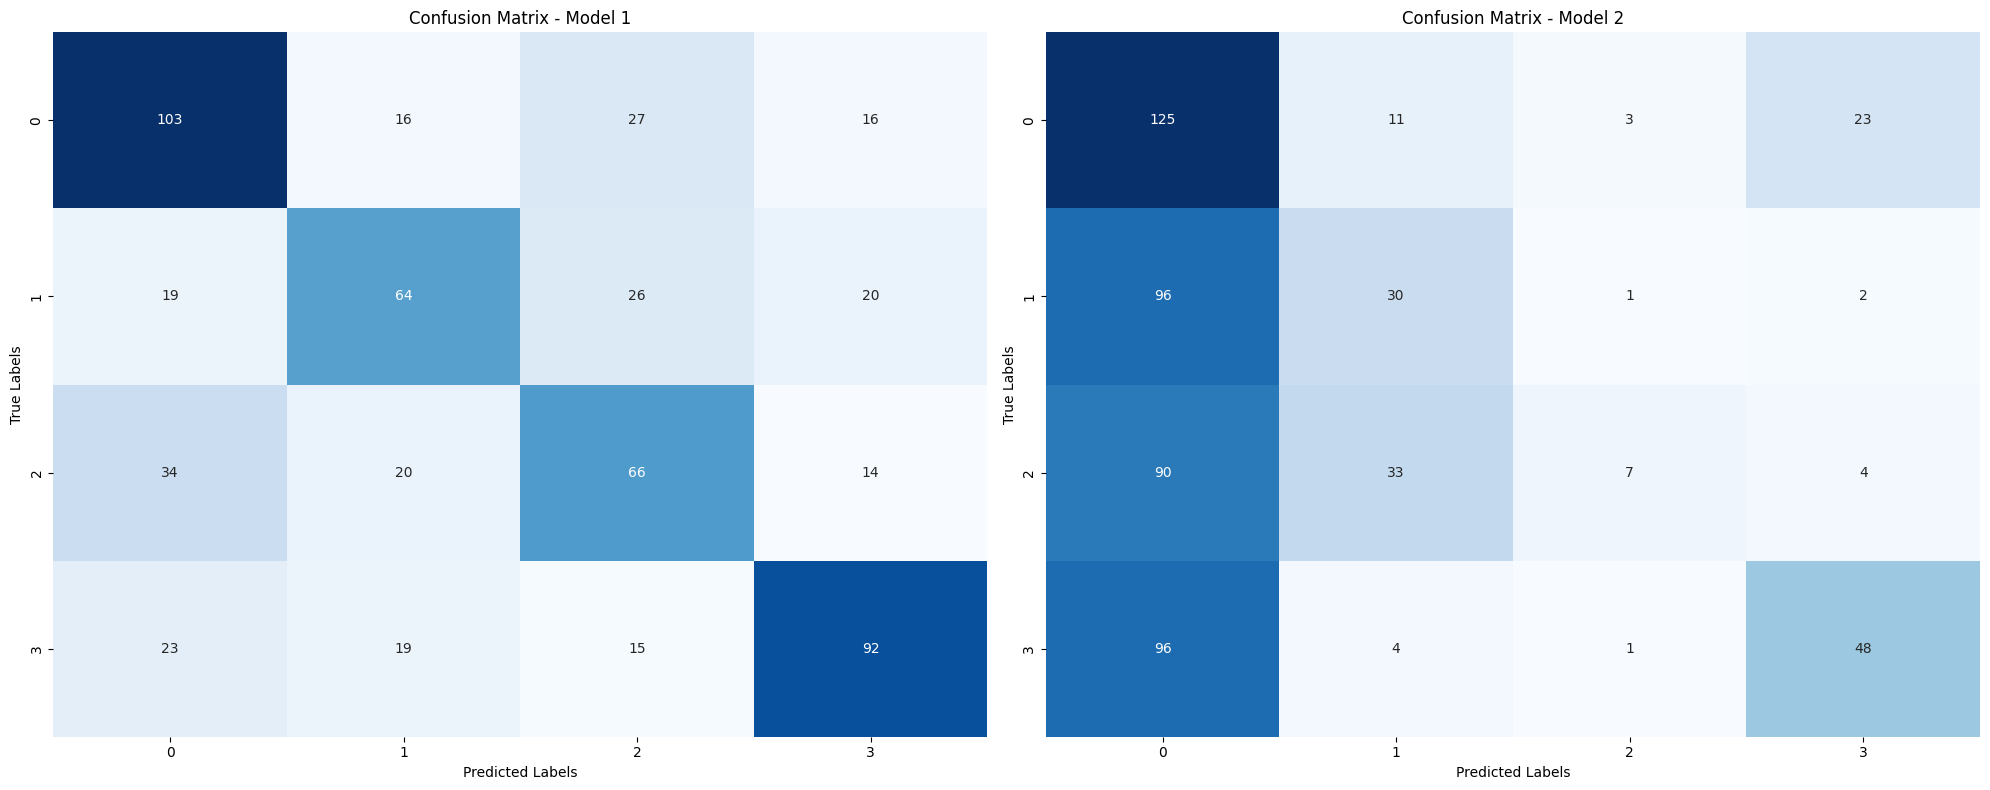

In [28]:
# Plot confusion matrices side by side
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Plot confusion matrix for model 1
sns.heatmap(cm_1, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[0])
axes[0].set_xlabel('Predicted Labels')
axes[0].set_ylabel('True Labels')
axes[0].set_title('Confusion Matrix - Model 1')

# Plot confusion matrix for model 2
sns.heatmap(cm_2, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[1])
axes[1].set_xlabel('Predicted Labels')
axes[1].set_ylabel('True Labels')
axes[1].set_title('Confusion Matrix - Model 2')

plt.tight_layout()
plt.show()
